# Binary Classfication - 분류


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#실습용 데이터 설정
import pandas as pd
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


# 1. 탐색적 데이터 분석 (EDA)

In [4]:
# default 빈도 분석
DF.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

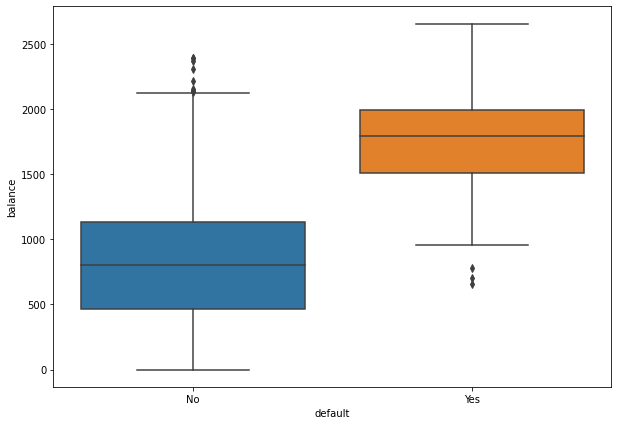

In [6]:
# default vs balance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 7))
sns.boxplot(x = 'default' , y = 'balance', order=['No', 'Yes'], data = DF)
plt.show()

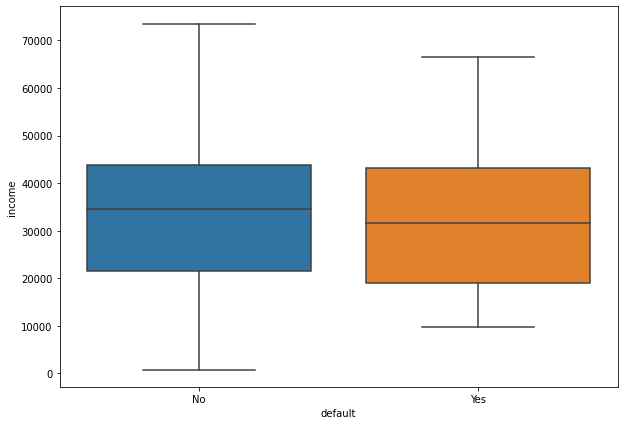

In [7]:
# default vs income
plt.figure(figsize = (10, 7))
sns.boxplot(data = DF, x= 'default', y ='income', order=['No', 'Yes'])
plt.show()

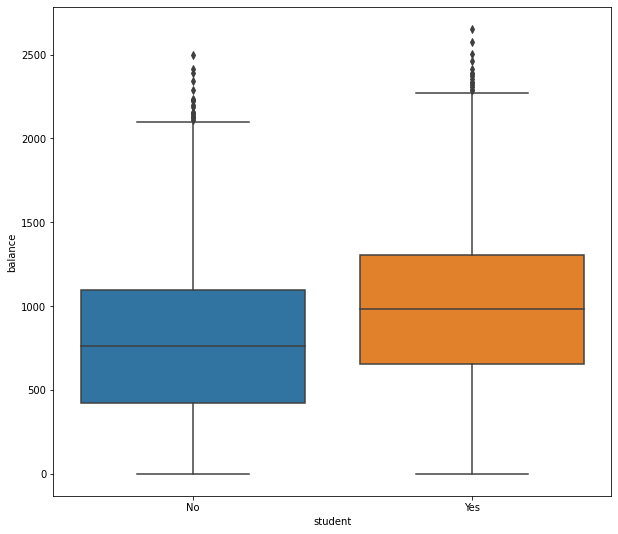

In [9]:
# student vs balance
plt.figure(figsize = (10, 9))
sns.boxplot(data = DF, x ='student', y ='balance', order=['No', 'Yes'])
plt.show()

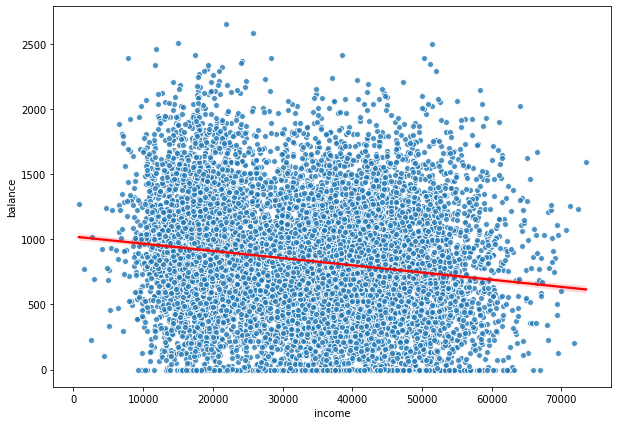

In [10]:
#income vs balance
plt.figure(figsize = (10, 7))
sns.regplot(data = DF, x = 'income', y ='balance', line_kws={'color':'red'}, scatter_kws={'edgecolor':'white'})
plt.show()

# 2. Data Preprocessing


In [13]:
# 1) X, y train_test_split()

from sklearn.model_selection import train_test_split
X = DF[['balance']]
y = DF['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2045)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7000, 1) (7000,)
(3000, 1) (3000,)


# 3. Modeling

In [14]:
# model 학습

from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
# 예측값 생성
y_hat = Model_lr.predict(X_test)
y_hat

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [18]:
#probability
import numpy as np
np.set_printoptions(precision = 3, suppress = True)
Model_lr.predict_proba(X_test)

array([[0.991, 0.009],
       [0.996, 0.004],
       [0.987, 0.013],
       ...,
       [0.96 , 0.04 ],
       [1.   , 0.   ],
       [0.991, 0.009]])

# 4. Model Validation

In [19]:
# 1) Confusion Matrix
# NO 상환 기준

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)

array([[2888,    8],
       [  72,   32]])

In [20]:
# Yes 기준
confusion_matrix(y_test, y_hat, labels=['Yes', 'No']
                 )

array([[  32,   72],
       [   8, 2888]])

In [22]:
#2) Accuracy, Precision, Recall No(상환)

from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label ='No'))
print(recall_score(y_test, y_hat, pos_label='No'))

0.9733333333333334
0.9756756756756757
0.9972375690607734


In [23]:
#3) Accuracy, Precision, Recall Yes(연체)
print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label ='Yes'))
print(recall_score(y_test, y_hat, pos_label='Yes'))

0.9733333333333334
0.8
0.3076923076923077


In [26]:
#4) F1_score - 'NO(상황)'
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, pos_label = 'No')

0.9863387978142076

In [28]:
#4) F1_score - 'NO(상황)'
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, pos_label = 'Yes')

0.4444444444444444

In [30]:
#6) Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, target_names = ['No','Yes'], digits = 5))

              precision    recall  f1-score   support

          No    0.97568   0.99724   0.98634      2896
         Yes    0.80000   0.30769   0.44444       104

    accuracy                        0.97333      3000
   macro avg    0.88784   0.65246   0.71539      3000
weighted avg    0.96959   0.97333   0.96755      3000

